In [1]:
import pandas as pd
import numpy as np

This data was saved from an interactive debugger in the function `test_calculate_plotting_data_workflow_vs_regression` in `test_sdec_plot.py`. The `expected_` dataframes correspond to the keys 

In [2]:
# Load the outputs from the saved plotting data
store = pd.HDFStore('debug_sdec_lum.h5')
expected_emission = store['expected_emission']
expected_absorption = store['expected_absorption']
expected_total = store['expected_total']
obtained_emission = store['obtained_emission']
obtained_absorption = store['obtained_absorption']
obtained_total = store['obtained_total']
store.close()

The three arrays here are the emission, absorption, and total luminosities used in the SDEC plots. The data are sorted into wavelength bins for plotting - some of them don't match the regression data.

There are several columns of interest, each of which correspond to a kind of interaction.

In [3]:
obtained_emission

atomic_number,noint,escatter,other,14,20
ion_number,,,,1,1
9053.870530,0.000000e+00,0.000000e+00,0.0,0.0,0.0
8974.646623,3.878448e-15,1.142722e-14,0.0,0.0,0.0
8896.797153,1.584229e-14,1.132526e-14,0.0,0.0,0.0
8820.286659,1.205378e-14,3.135289e-14,0.0,0.0,0.0
8745.080892,1.637657e-14,1.999693e-14,0.0,0.0,0.0
...,...,...,...,...,...
501.221728,0.000000e+00,0.000000e+00,0.0,0.0,0.0
500.976905,0.000000e+00,0.000000e+00,0.0,0.0,0.0
500.732321,0.000000e+00,0.000000e+00,0.0,0.0,0.0


The leftmost column is the wavelength bin in angstroms. The others are the luminosities from each source - packets that undergo no interaction, packets that undergo electron scattering, and then three sets of line interactions, in this case: "other", (14, 1), and (20, 1).

In [4]:
results = [(obtained_emission, expected_emission),
           (obtained_absorption, expected_absorption),
           (obtained_total, expected_total)]

# Check test passing conditions
for (expected, obtained) in results:
    print(np.allclose(expected, obtained, atol=0, rtol=1e-12))

False
False
False


Tests fail in all cases.

## Check which values are different

In [5]:
# Function to get rows where expected and obtained results are not within tolerance
def check_mismatch(obtained, expected, key, verbose=True):
    mismatch = ~np.isclose(obtained[key], expected[key], atol=0.0, rtol=1e-12)
    comparison = pd.concat([obtained[key][mismatch], expected[key][mismatch]], axis=1)
    if hasattr(comparison.columns, 'levels'):
        bottomlevel = comparison.columns.levels
        comparison.columns = pd.MultiIndex.from_product(bottomlevel + [['obtained', 'expected']])
    else:
          comparison.columns = pd.MultiIndex.from_product([["expected", "obtained"]])

    if verbose:
        print(np.allclose(obtained[key], expected[key], atol=0, rtol=1e-12))
        print(comparison)
        print("\nNumber of mismatched elements: ", len(comparison), " out of ", len(obtained))
        print("Total luminosity obtained: ", sum(obtained[key]))
        print("Total luminosity expected: ", sum(expected[key]))
    return comparison

In [6]:
# Start with the emission luminosity
test = check_mismatch(obtained_emission, expected_emission, (14, 1))

False
                       14              
                        1              
                 obtained      expected
6562.756358  0.000000e+00  1.343273e-14
6359.300477  1.475182e-14  2.220046e-14
6023.189279  0.000000e+00  8.322644e-15
5918.910920  0.000000e+00  8.776467e-15
5884.949242  0.000000e+00  8.898866e-15
4322.455155  0.000000e+00  1.563096e-14
4181.476061  0.000000e+00  1.712747e-14
4081.632653  1.857060e-14  3.669604e-14
3880.857670  0.000000e+00  2.019007e-14
3866.228494  0.000000e+00  1.969939e-14
3794.706385  2.155699e-14  4.287054e-14
3753.049353  4.433725e-14  6.653133e-14
3242.805026  0.000000e+00  2.869550e-14
3095.975232  0.000000e+00  3.300748e-14
2308.535811  0.000000e+00  5.695427e-14
2233.139795  0.000000e+00  5.657997e-14
2180.906167  0.000000e+00  6.559122e-14
2113.494663  0.000000e+00  6.678434e-14
2091.940798  0.000000e+00  6.863215e-14
2033.863833  0.000000e+00  7.455443e-14
1994.316199  7.918214e-14  1.551261e-13
1982.750074  0.000000e+00  7.24786

Looks like we're missing some emission luminosity for Si II. 

In [7]:
_ = check_mismatch(obtained_emission, expected_emission, (20, 1))

False
                       20              
                        1              
                 obtained      expected
8896.797153  0.000000e+00  7.475394e-15
8820.286659  0.000000e+00  7.723865e-15
8456.659619  4.246261e-15  8.538182e-15
8319.467554  4.434941e-15  1.345168e-14
8252.527336  4.636053e-15  9.266068e-15
4198.593471  0.000000e+00  1.615864e-14
4081.632653  1.718435e-14  3.470676e-14
4065.453806  1.780108e-14  3.586003e-14
4033.477866  1.773867e-14  5.457257e-14
4017.677782  0.000000e+00  1.869396e-14
3971.011615  1.859221e-14  5.717979e-14
3940.498473  3.903258e-14  5.876897e-14
3895.597974  8.067306e-14  1.214978e-13
3880.857670  0.000000e+00  2.012355e-14
3851.709196  4.155086e-14  6.270055e-14
3685.616880  0.000000e+00  2.251378e-14
3294.892916  0.000000e+00  2.718229e-14
3124.267750  3.190576e-14  6.335361e-14
3114.779629  0.000000e+00  3.220752e-14
3086.657921  0.000000e+00  3.259129e-14
3077.396523  3.335399e-14  6.663458e-14
3059.039462  3.324304e-14  6.70431

Same story for this Ca II line.

In [8]:
_ = check_mismatch(obtained_emission, expected_emission, 'other')

False
                 expected      obtained
7995.202878  0.000000e+00  4.366175e-15
7158.196135  0.000000e+00  5.885762e-15
7059.654077  0.000000e+00  5.859953e-15
6521.030323  0.000000e+00  6.857630e-15
6243.171531  0.000000e+00  7.691618e-15
...                   ...           ...
1770.538244  0.000000e+00  9.596205e-14
1543.984251  0.000000e+00  1.266674e-13
1406.370860  3.076331e-13  4.609456e-13
1381.740302  1.624152e-13  3.224604e-13
1292.908397  0.000000e+00  1.725315e-13

[106 rows x 2 columns]

Number of mismatched elements:  106  out of  1938
Total luminosity obtained:  1.5959150353012202e-11
Total luminosity expected:  2.0453035223142868e-11


In [9]:
# Absorption luminosity
print(np.allclose(obtained_absorption[(14, 1)], expected_absorption[(14, 1)], atol=0, rtol=1e-12))
print(np.allclose(obtained_absorption[(20, 1)], expected_absorption[(20, 1)], atol=0, rtol=1e-12))
print(np.allclose(obtained_absorption['other'], expected_absorption['other'], atol=0, rtol=1e-12))

False
False
False


The same thing appears to be happening for the absorption luminosities as well.

## Plot the luminosity for all packets

In [14]:
import matplotlib.pyplot as plt

def plot_obtained_expected(obtained, expected, key, title=None):
    fig, (ax1, ax2) = plt.subplots(2, 1, height_ratios=(3, 1))
    ax1.scatter(obtained[key].index, obtained[key], label='obtained', alpha=0.5, edgecolors='none')
    ax1.scatter(expected[key].index, expected[key], label='expected', alpha=0.5, edgecolors='none')
    ax1.legend()
    ax1.semilogy()
    ax1.set_ylabel("luminosity (erg $s^{-1}$)")

    ax2.scatter(obtained[key].index, expected[key]-obtained[key], label='expected - obtained', edgecolors='none')
    ax2.semilogy()
    ax2.legend()
    ax2.set_ylim(1e-15, 1e-12)
    ax2.set_xlabel("wavelength (angstroms)")
    ax2.set_ylabel("residual")

    plt.subplots_adjust(hspace=0.0)
    plt.suptitle(title)

### Emission

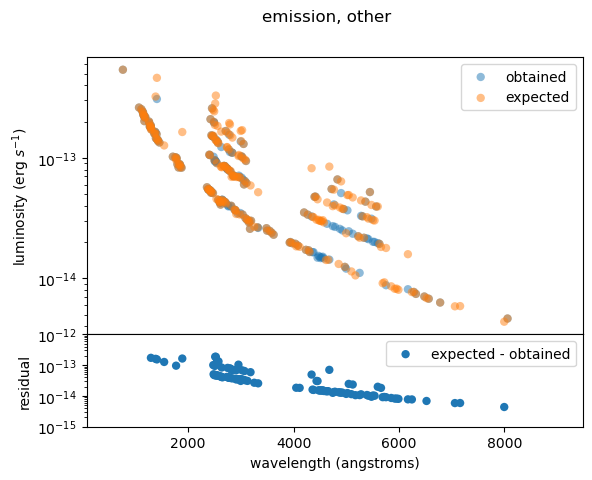

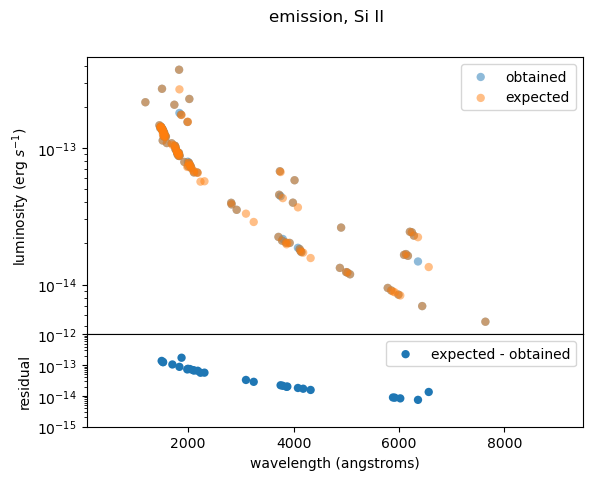

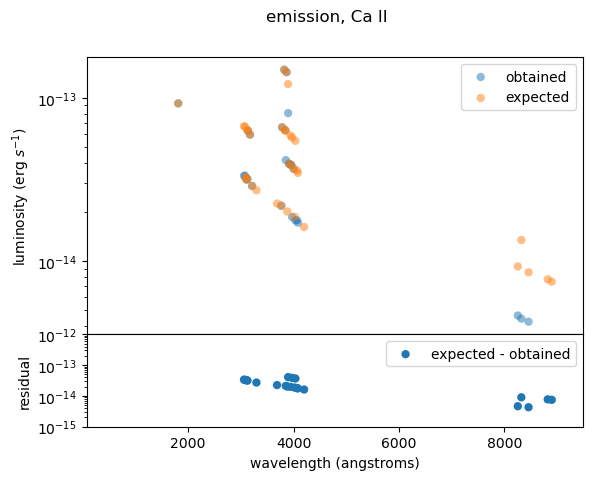

In [15]:
plot_obtained_expected(obtained_emission, expected_emission, "other", title='emission, other')
plot_obtained_expected(obtained_emission, expected_emission, (14, 1), title='emission, Si II')
plot_obtained_expected(obtained_emission, expected_emission, (20, 1), title='emission, Ca II')

In all cases, there are missing packets, i.e. the obtained luminosity is never *higher* than the expected result. So, something is being filtered in a different way than it used to be.

### Absorption

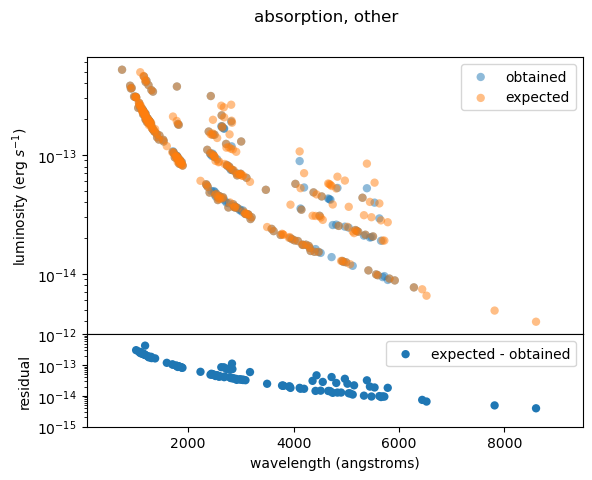

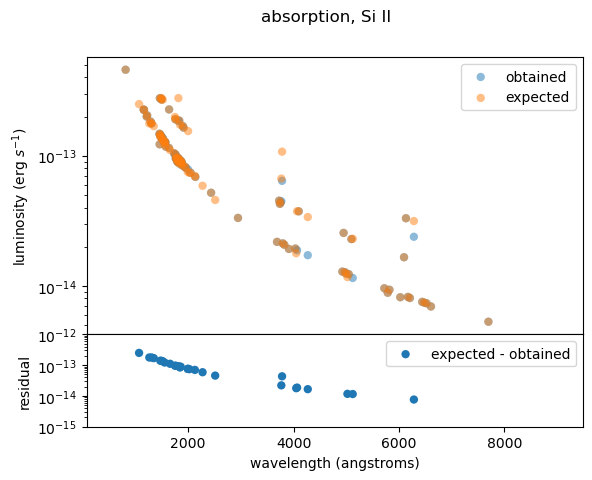

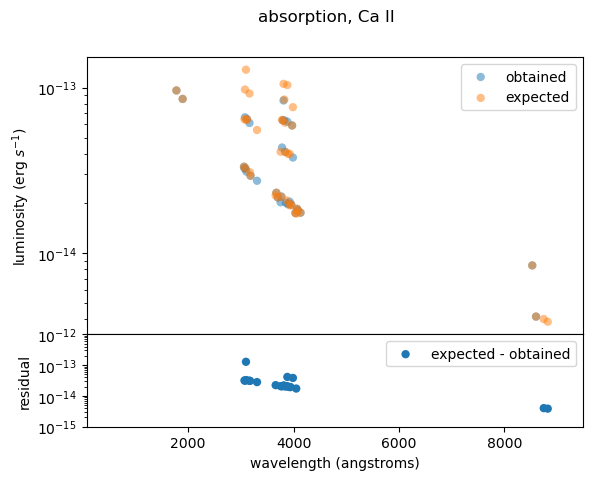

In [16]:
plot_obtained_expected(obtained_absorption, expected_absorption, "other", title='absorption, other')
plot_obtained_expected(obtained_absorption, expected_absorption, (14, 1), title='absorption, Si II')
plot_obtained_expected(obtained_absorption, expected_absorption, (20, 1), title='absorption, Ca II')

### Total

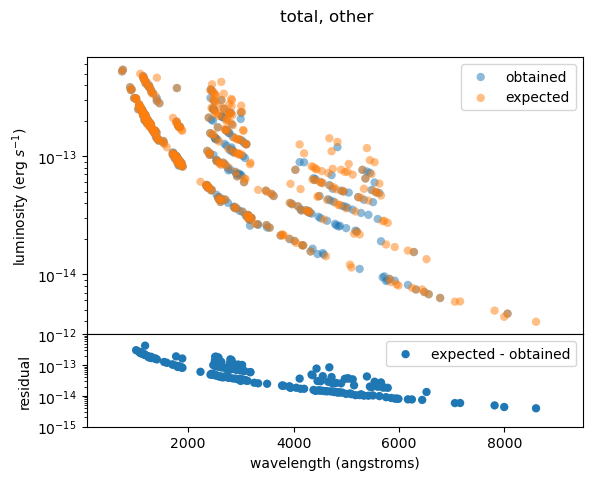

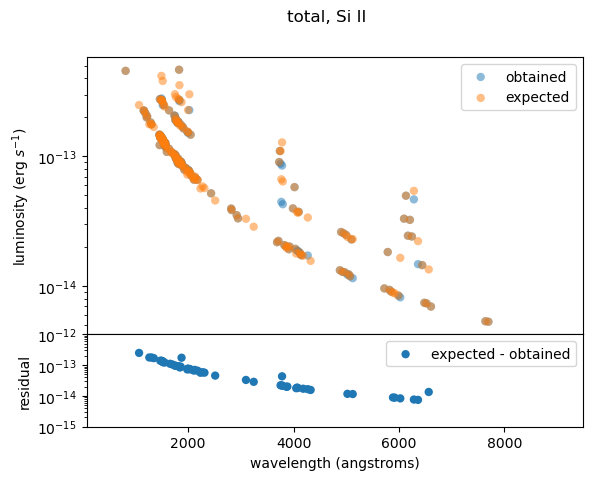

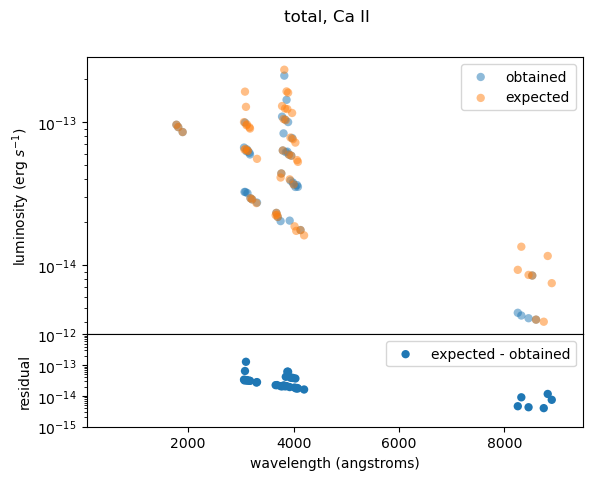

In [17]:
plot_obtained_expected(obtained_total, expected_total, "other", title='total, other')
plot_obtained_expected(obtained_total, expected_total, (14, 1), title='total, Si II')
plot_obtained_expected(obtained_total, expected_total, (20, 1), title='total, Ca II')